# EDA of Lending Club Loan Dataset
The purpose of this code is to perform exploratory data analysis on the loan dataset available from the The Lending Club. Lending Club is the finanacial company which provide loans to customers for various purpose. The loan data/file contains information about past loan applicants.

The aim is to identify variables and patterns which lead to loan default.

In [813]:
#importing libraries required for the analysis
#import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#to see all the rows/columns in scrollable window
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Understanding data

In [825]:
#load data from csv to dataframe
df=pd.read_csv('loan.csv', low_memory=False)

In [815]:
df.shape

(39717, 111)

In [816]:
#Looking at columns
sorted(df.columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_

After going through the columns and understanding their meaning through data dictionary following are some insights:

Data contains the complete loan data for all loans issued through the time period 2007 to 2011.

The target variable in this analysis is 'loan_status' column which contains information of whether the customer has defaulted or not.

All variables/columns can be broadly classified into 'consumer attributes' and 'loan attributes'

Following is the list of relevant columns prepared by exluding the
- Columns/variables/features which are not useful.
- Columns/variables/features which are irrelevant to the analysis
- Columns/variables/features which have redundant information
- Columns/variables/features which will not be available to LC during portfolio risk analysis.

['addr_state',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'dti',
 'dti_joint',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'tax_liens',
 'term',
 'verification_status',
 'verification_status_joint']

# 1. Data Cleaning

## a) Fixing Rows and Columns
From above data understanding;
- There are no rows which are required to be removed at this stage.
- We have identified a list of columns which are required for further analysis so keeping only those columns in data.

In [826]:
required_columns = ['addr_state',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'dti',
 'dti_joint',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'id',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'term',
 'verification_status',
 'verification_status_joint']

In [827]:
#finding columns to drop
columns_to_drop = [col for col in df.columns if col not in required_columns]

In [828]:
df.drop(labels=columns_to_drop, axis=1, inplace=True)

Columns with 1 unique value or very high percentage of unique values do not help in analysis. Lets check unique value count.

In [829]:
pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

,Unique Value Count
dti_joint,1
annual_inc_joint,1
application_type,1
pymnt_plan,1
verification_status_joint,1
term,2
verification_status,3
loan_status,3
pub_rec_bankruptcies,4
home_ownership,5


In [559]:
df.shape

(39717, 23)

'dti_joint', 'annual_inc_joint', 'application_type', 'verification_status_joint','pymnt_plan', 'emp_title', 'id' either have very high percentage of unique values or only 1 unique value.

In [830]:
df.drop(['dti_joint', 'annual_inc_joint','application_type','pymnt_plan', 'verification_status_joint', 'emp_title', 'id'], axis=1, inplace=True)

In [831]:
df.shape

(39717, 16)

## a) Fix missing values
We will find the percentage of null/missing values in each column to decide whether to remove column.

In [832]:
#percentage of missing values in each coloumn
percentage_of_null_values = (df.isnull().sum()/len(df.index)*100)
percentage_of_null_values

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

There are colums 'annual_inc_joint', 'dti_joint' and 'verification_status_joint' which can be removed as all of the values are missing.

In [673]:
df.shape

(39717, 16)

In [834]:
#finding columns with missing values
columns_with_missing_values = (df.isnull().sum()/len(df.index))*100
columns_with_missing_values[columns_with_missing_values != 0]

emp_length              2.706650
pub_rec_bankruptcies    1.754916
dtype: float64

Number of missing values is insignificant in above column so will not drop them nor will impute the values.

# Standardize values

In [835]:
df.describe()

,loan_amnt,installment,annual_inc,dti,pub_rec_bankruptcies
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39020.000000
mean,11219.443815,324.561922,6.896893e+04,13.315130,0.043260
std,7456.670694,208.874874,6.379377e+04,6.678594,0.204324
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000
25%,5500.000000,167.020000,4.040400e+04,8.170000,0.000000
50%,10000.000000,280.220000,5.900000e+04,13.400000,0.000000
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,2.000000


<Axes: xlabel='annual_inc', ylabel='Count'>

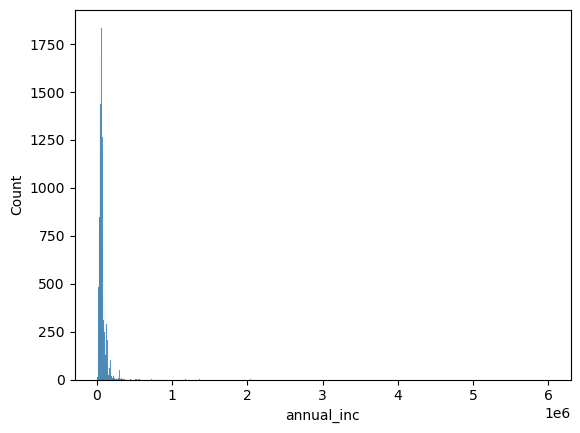

In [836]:
#from above description 'annual_inc'
sns.histplot(df["annual_inc"])

Removing otliers using IQR

In [837]:
percentile25 = df['annual_inc'].quantile(0.25)
percentile75 = df['annual_inc'].quantile(0.75)

In [838]:
iqr = percentile75-percentile25

In [839]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [840]:
df = df[df['annual_inc'] < upper_limit]
df = df[df['annual_inc'] > lower_limit]

In [841]:
df.shape

(37874, 16)

<Axes: xlabel='annual_inc', ylabel='Count'>

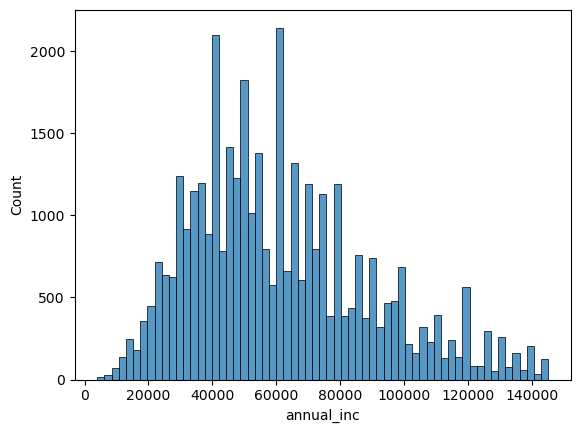

In [842]:
sns.histplot(df["annual_inc"])

## c) Fix invalid values

In [843]:
#Check data types
df.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [844]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


We will remove '%' string from the 'int_rate' column and convert it to numeric.

In [845]:
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')

In [846]:
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [847]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [848]:
df.dtypes

loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

## Filter Data

We will check and remove any duplicate rows.

In [849]:
#find duplicate rows
df.duplicated().sum()

0

# Data Analysis
Our aim is to find variables which lead to 'Charged Off'(Default) status of the loan.

## Univariate Analysis

In [851]:
df.dtypes

loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

#### Let us understand some important variables useful for analysis. First lets see our target variable loan_status.

In [852]:
#Values in 'loan_status'
df['loan_status'].value_counts()

loan_status
Fully Paid     31386
Charged Off     5431
Current         1057
Name: count, dtype: int64

#### The label 'Charged Off' indicates Defaulted Loans. Let us see the distribution of 'loan_status'.


[Text(0, 0, '31386'), Text(0, 0, '5431'), Text(0, 0, '1057')]

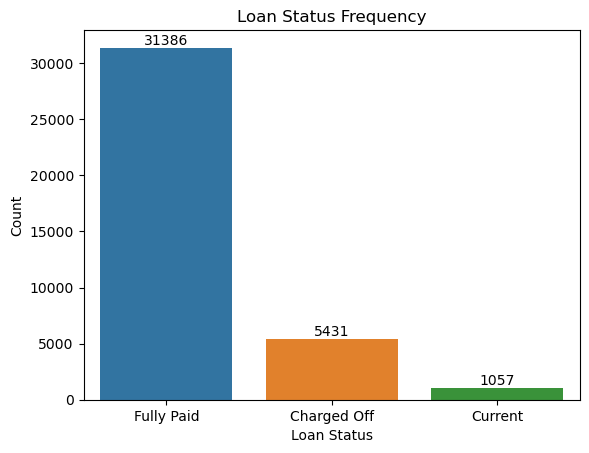

In [1008]:
#frequency of loan_status
ax = sns.countplot(x=df["loan_status"])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Frequency')
ax.bar_label(ax.containers[0])

In [855]:
#percentage of Defaulted loans
print (df[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df))

14.339652532080056


### Note: 5431 number of loans have defaulted which is approx 14% of total loans.

Text(0.5, 1.0, 'Grade Frequency')

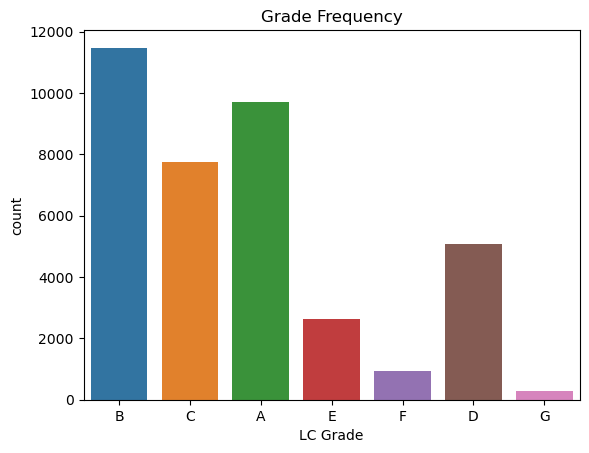

In [1007]:
#frequency of grade
sns.countplot(data=df, x='grade')
plt.xlabel('LC Grade')
plt.title('Grade Frequency')

### Note: Major number of the laons are graded as good by LC.

In [857]:
#Values in 'term'
df['term'].value_counts()

term
 36 months    27838
 60 months    10036
Name: count, dtype: int64

[Text(0, 0, '27838'), Text(0, 0, '10036')]

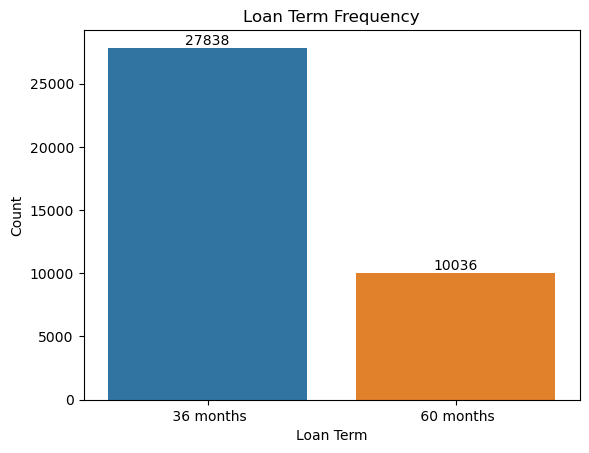

In [1014]:
#frequency of term
ax = sns.countplot(x=df["term"])
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Loan Term Frequency')
ax.bar_label(ax.containers[0])

### Note: Most loans taken are for shorter (36 months) term.

Text(0.5, 1.0, 'Employment Length Frequency')

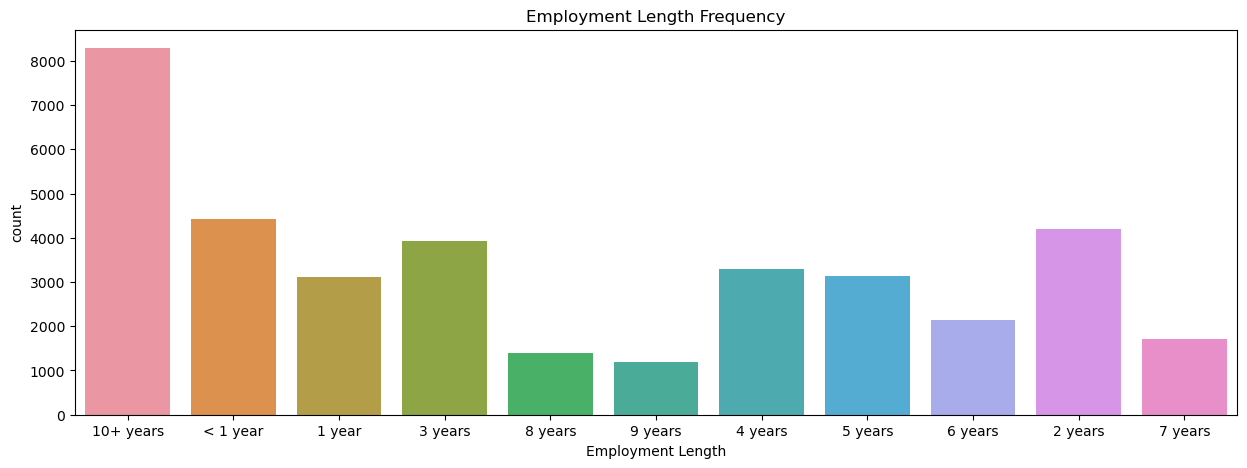

In [1013]:
#frequency of emp_length
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df["emp_length"])
plt.xlabel('Employment Length')
plt.title('Employment Length Frequency')

### Note: Most loans taken are by people who have more than 10 years of experience.

Text(0.5, 1.0, 'Home Ownership Frequency')

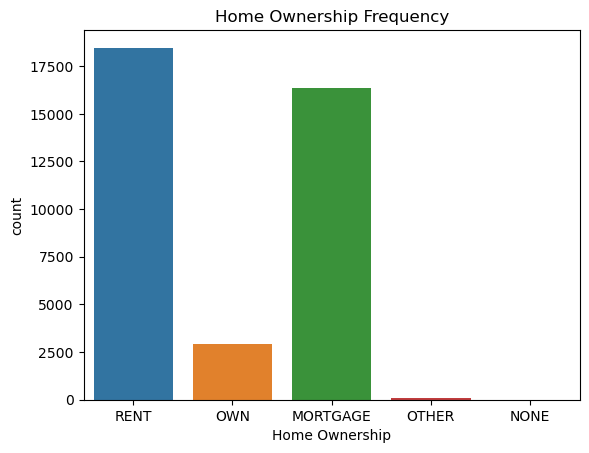

In [1012]:
#frequency of home_ownership 
ax = sns.countplot(x=df["home_ownership"])
plt.xlabel('Home Ownership')
plt.title('Home Ownership Frequency')

### Note: People applying for loans mostly live on rent or have mortgaged homes. Those who own house are very less in number.

Text(0.5, 1.0, 'Verification Status Frequency')

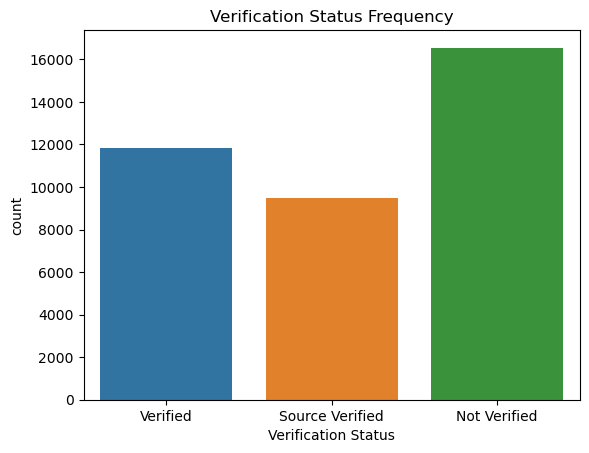

In [1011]:
#frequency of verification_status 
ax = sns.countplot(x=df["verification_status"])
plt.xlabel('Verification Status')
plt.title('Verification Status Frequency')

### Note: Considerable number of loans are not verified.

Text(0.5, 1.0, 'Purpose Frequency')

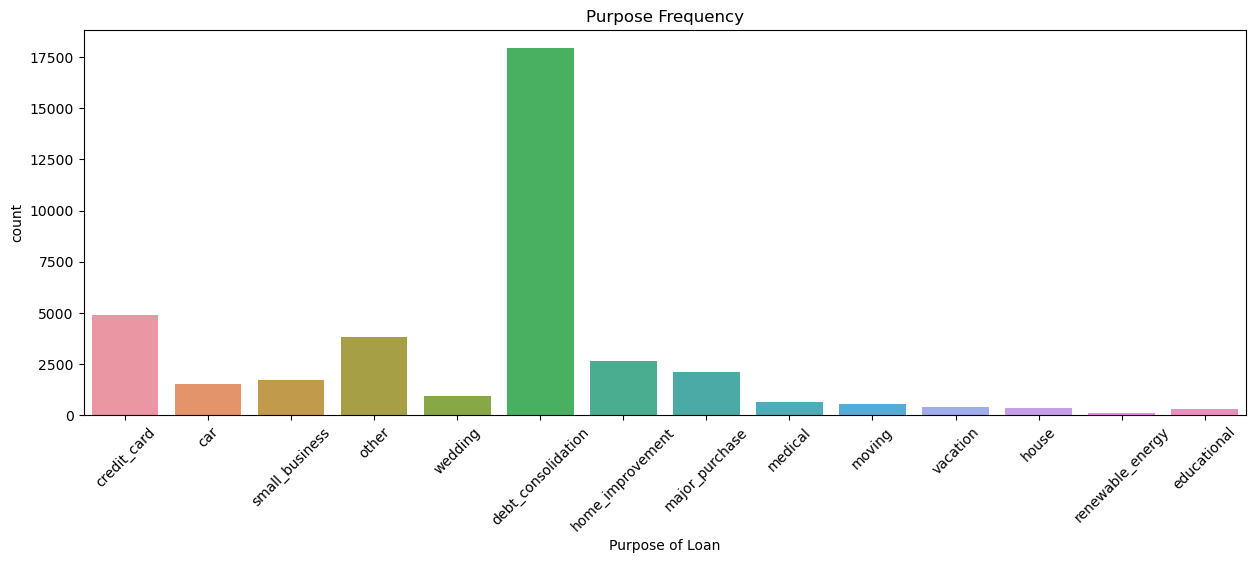

In [1010]:
#frequency of purpose
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
ax = sns.countplot(x=df["purpose"])
plt.xlabel('Purpose of Loan')
plt.title('Purpose Frequency')

### Note: The top reason for taking loan is 'Debt consolidation' and is way ahead of second top reason 'Credit Card'.

Text(0.5, 1.0, 'Interest Rate Frequency')

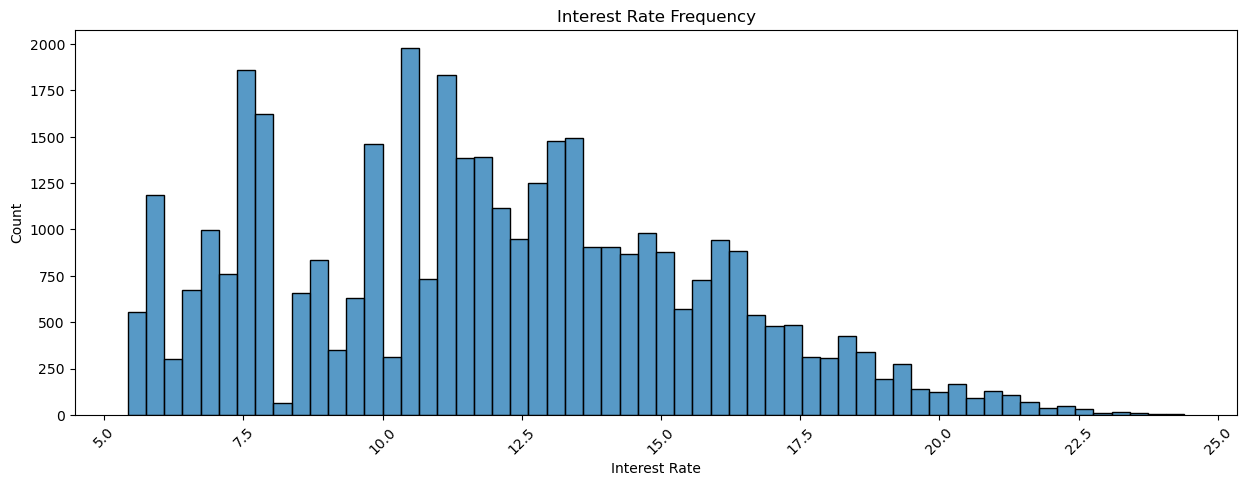

In [1040]:
#frequency of purpose
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
ax = sns.histplot(x=df["int_rate"])
plt.xlabel('Interest Rate')
plt.title('Interest Rate Frequency')

### Note: Maximum loans have Interest rates between 6 to 16.

In [1043]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    35570
1.0     1637
nan      661
2.0        6
Name: count, dtype: int64

Text(0.5, 1.0, 'Interest Rate Frequency')

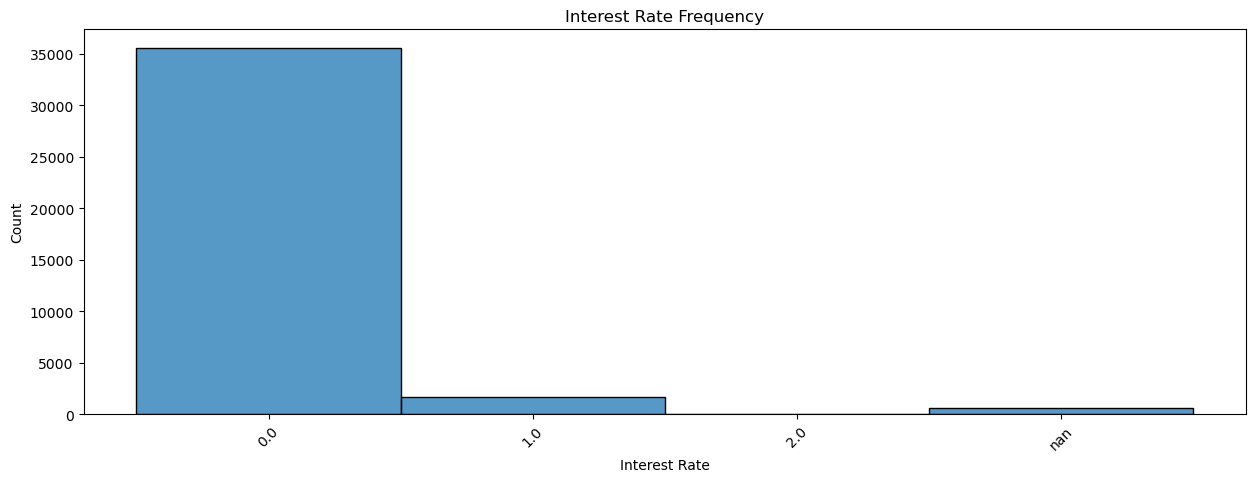

In [1042]:
#frequency of purpose
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
ax = sns.histplot(x=df["pub_rec_bankruptcies"])
plt.xlabel('Interest Rate')
plt.title('Interest Rate Frequency')

### Note: Maximum loans have Interest rates between 6 to 16.

## Derived Metrics

#### Now we will analyse to understand the influence of other variables one by one on our target variable 'loan_status'. We will do Segmented univariate analysis by plotting 'loan_status' with one categorical variable for segmentation.
#### For doing segmented univariate analysis we will derive a numerical variable from 'loan_status' and for segmentation we will derive ordinal attributes from variables like 'loan_amnt', 'int_rate', 'installment', 'annual_inc' and 'dti'. Finally we will derive 'month' and 'year' from date column 'issue_d'.

### Business driven metric

In [871]:
df['loan_status'].value_counts()

loan_status
Fully Paid     31386
Charged Off     5431
Current         1057
Name: count, dtype: int64

#### Analysing further as a target variable we only need whether the loan has defaulted or not so we extract only defaulted/charge_off info from 'loan_status' assigning numeral 1 for 'charged_off' status and 0 for all other. 

In [864]:
df['loan_default'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [872]:
df['loan_default'].value_counts()

loan_default
0    32443
1     5431
Name: count, dtype: int64

### Type driven metric

In [920]:
q = df['loan_amnt'].describe()
q

count    37874.000000
mean     10869.161562
std       7174.041656
min        500.000000
25%       5100.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [921]:
bins = [0, q[4], q[5], q[6], q[7]]
labels = ['<'+str(q[4]), str(q[4])+' to '+str(q[5]), str(q[5])+' to '+str(q[6]), str(q[6])+' to '+str(q[7])]
df['loan_amnt_level'] = pd.cut(x = df['loan_amnt'], bins = bins, labels = labels, include_lowest = True)

In [922]:
df['loan_amnt_level'].value_counts()

loan_amnt_level
9600.0 to 15000.0     10525
5100.0 to 9600.0       9694
<5100.0                9482
15000.0 to 35000.0     8173
Name: count, dtype: int64

In [923]:
q = df['int_rate'].describe()
q

count    37874.000000
mean        11.974104
std          3.698902
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [924]:
bins = [0, q[4], q[5], q[6], q[7]]
labels = ['<'+str(q[4]), str(q[4])+' to '+str(q[5]), str(q[5])+' to '+str(q[6]), str(q[6])+' to '+str(q[7])]
df['int_rate_level'] = pd.cut(x = df['int_rate'], bins = bins, labels = labels, include_lowest = True)

In [926]:
df['int_rate_level'].value_counts()

int_rate_level
8.94 to 11.83     9552
<8.94             9494
11.83 to 14.46    9414
14.46 to 24.4     9414
Name: count, dtype: int64

In [967]:
df['installment'].tail()

39711    158.30
39712     78.42
39713    275.38
39714    156.84
39716    255.43
Name: installment, dtype: float64

In [971]:
q = df['installment'].describe()
q

count    37874.000000
mean       314.532940
std        200.087403
min         15.690000
25%        164.020000
50%        273.760000
75%        413.037500
max       1305.190000
Name: installment, dtype: float64

In [974]:
bins = [0, q[4], q[5], q[6], q[7]]
labels = ['<'+str(round(q[4],2)), str(round(q[4],2))+' to '+str(round(q[5],2)), str(round(q[5],2))+' to '+str(round(q[6],2)), str(round(q[6],2))+' to '+str(round(q[7],2))]
df['installment_level'] = pd.cut(x = df['installment'], bins = bins, labels = labels, include_lowest = True)

In [975]:
df['installment_level'].value_counts()

installment_level
<164.02              9480
413.04 to 1305.19    9469
164.02 to 273.76     9468
273.76 to 413.04     9457
Name: count, dtype: int64

In [960]:
q = df['annual_inc'].describe()
q

count     37874.000000
mean      61360.038960
std       28210.186388
min        4000.000000
25%       40000.000000
50%       56178.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [961]:
bins = [0, q[4], q[5], q[6], q[7]]
labels = ['<'+str(q[4]), str(q[4])+' to '+str(q[5]), str(q[5])+' to '+str(q[6]), str(q[6])+' to '+str(q[7])]
df['annual_inc_level'] = pd.cut(x = df['annual_inc'], bins = bins, labels = labels, include_lowest = True)

In [962]:
df['annual_inc_level'].value_counts()

annual_inc_level
<40000.0               9877
56178.0 to 78000.0     9526
78000.0 to 145008.0    9411
40000.0 to 56178.0     9060
Name: count, dtype: int64

In [957]:
q = df['dti'].describe()
q

count    37874.000000
mean        13.483965
std          6.666785
min          0.000000
25%          8.390000
50%         13.620000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

In [958]:
bins = [0, q[4], q[5], q[6], q[7]]
labels = ['<'+str(q[4]), str(q[4])+' to '+str(q[5]), str(q[5])+' to '+str(q[6]), str(q[6])+' to '+str(q[7])]
df['dti_level'] = pd.cut(x = df['dti'], bins = bins, labels = labels, include_lowest = True)

In [959]:
df['dti_level'].value_counts()

dti_level
<8.39             9477
8.39 to 13.62     9472
18.75 to 29.99    9465
13.62 to 18.75    9460
Name: count, dtype: int64

### Data driven metric

In [937]:
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [938]:
df['year'] = pd.DatetimeIndex(df['issue_d']).year
df['month'] = pd.DatetimeIndex(df['issue_d']).month

In [1048]:
df['year'].value_counts()

year
2011    20590
2010    11061
2009     4498
2008     1494
2007      231
Name: count, dtype: int64

In [1049]:
df['month'].value_counts()

month
12    4246
11    3980
10    3710
9     3444
8     3347
7     3330
6     3121
5     2871
4     2724
3     2564
1     2274
2     2263
Name: count, dtype: int64

In [942]:
#df['pub_rec'] = df['pub_rec'].astype(str)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(str)
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [943]:
df.dtypes

loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec_bankruptcies            object
loan_default                     int64
loan_amnt_level               category
int_rate_level                category
installment_level             category
annual_inc_level              category
dti_level                     category
year                            object
month                           object
dtype: object

# Segmented Univariate Analysis

We will use Bar Plots to analyse influence on 'loan_default' of segmented categorical variables. The Bar plot will show average of defaults(Default Rate) on one axis and grouped categorical variables on another.

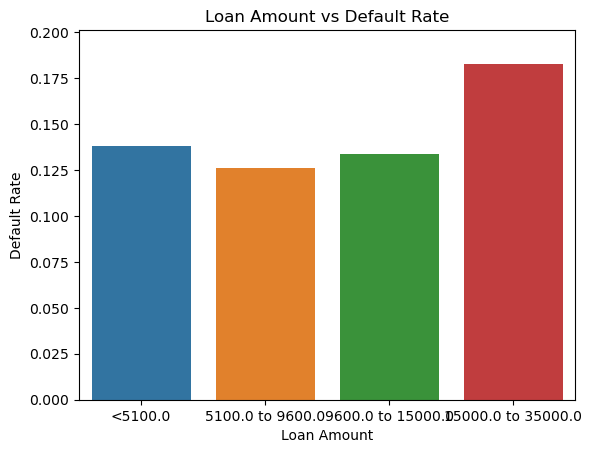

In [1050]:
ax = sns.barplot(x='loan_amnt_level', y='loan_default', data=df,errwidth=0)
plt.xlabel('Loan Amount')
plt.ylabel('Default Rate')
plt.title('Loan Amount vs Default Rate')
plt.show()

### Note: Default rate is higher in case of very high loan amounts (15000 to 35000).

Text(0.5, 1.0, 'Loan Term vs Default Rate')

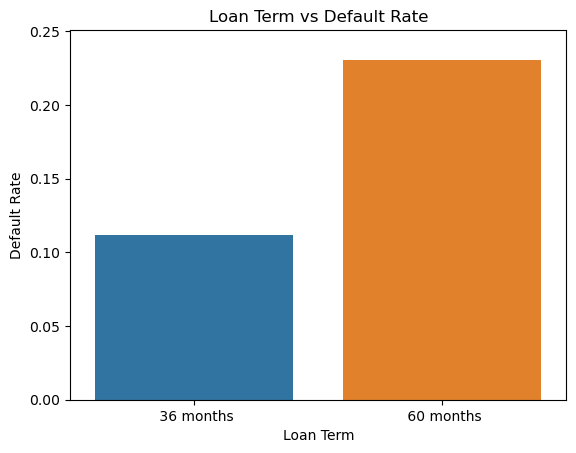

In [1031]:
sns.barplot(y='loan_default', x='term', data=df, errwidth=0)
plt.xlabel('Loan Term')
plt.ylabel('Default Rate')
plt.title('Loan Term vs Default Rate')

### Note: Default rate is higher in Loans with higher terms(60 months).

Text(0.5, 1.0, 'Loan Interest Rate vs Default Rate')

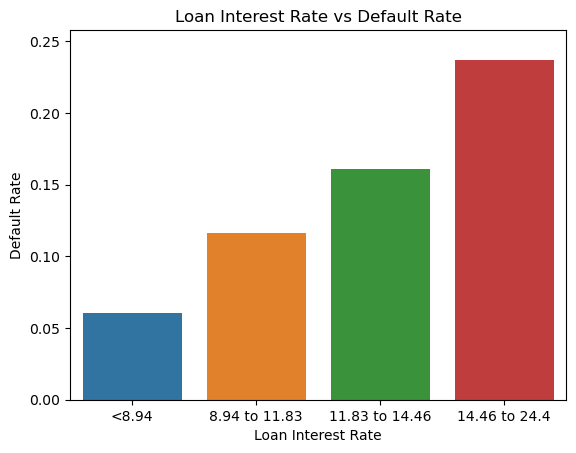

In [1033]:
sns.barplot(y='loan_default', x='int_rate_level', data=df, errwidth=0)
plt.xlabel('Loan Interest Rate')
plt.ylabel('Default Rate')
plt.title('Loan Interest Rate vs Default Rate')

### Note: Default rate increases with increase in interest rates.

Text(0.5, 1.0, 'Installment vs Default Rate')

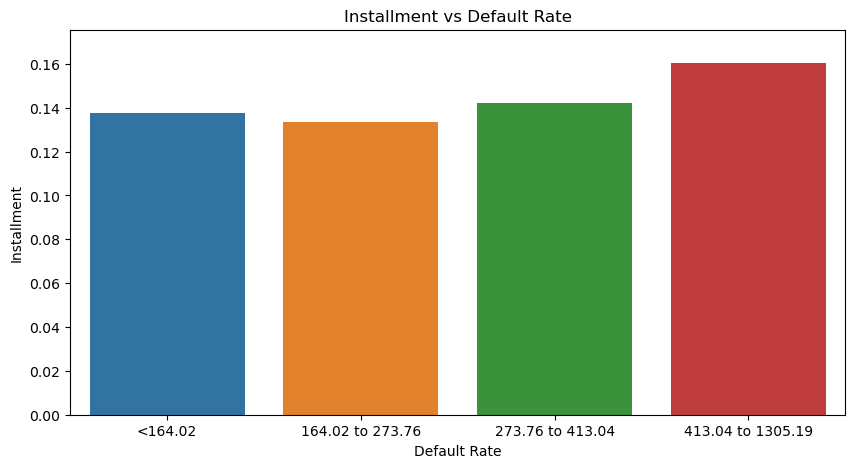

In [1024]:
plt.figure(figsize=(10,5))
sns.barplot(x='installment_level', y='loan_default', data=df, errwidth=0)
plt.xlabel('Default Rate')
plt.ylabel('Installment')
plt.title('Installment vs Default Rate')

### Note: Default rate is high for very high installments.

Text(0.5, 1.0, 'Loan Grade vs Default Rate')

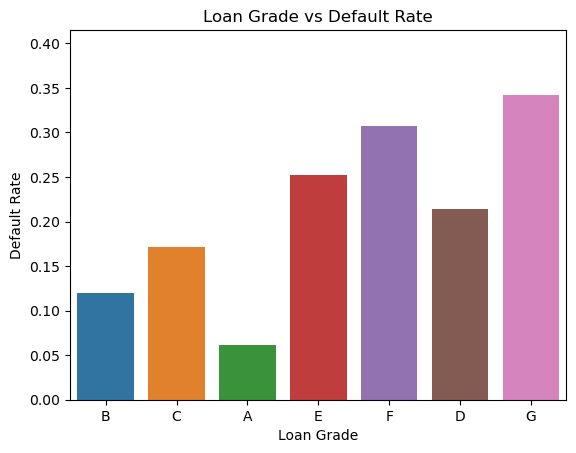

In [1034]:
sns.barplot(x='grade', y='loan_default', data=df, errwidth=0)
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.title('Loan Grade vs Default Rate')

### Note: Default rate increases with decrease in grades. As expected lower grade laons default more.

<Axes: xlabel='emp_length', ylabel='loan_default'>

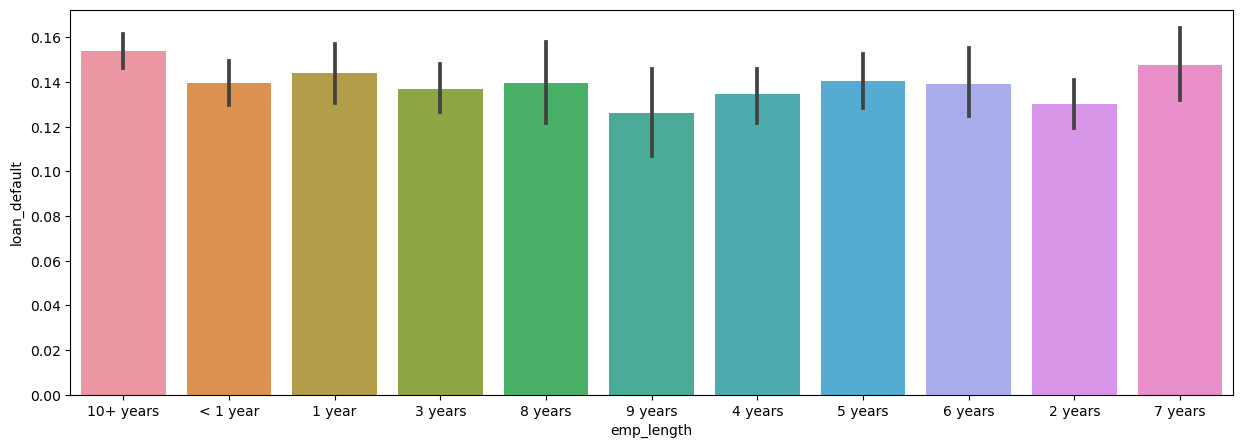

In [977]:
plt.figure(figsize=(15,5))
sns.barplot(x='emp_length', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Default rate is almost similar across employment length so we can conlude that it does not have any impact.

<Axes: xlabel='home_ownership', ylabel='loan_default'>

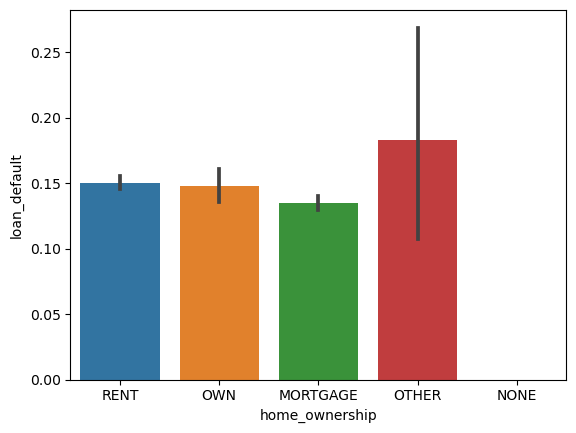

In [979]:
sns.barplot(x='home_ownership', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Home ownership does not have any impact on Default rate.

Text(0.5, 1.0, 'Annual Income vs Default Rate')

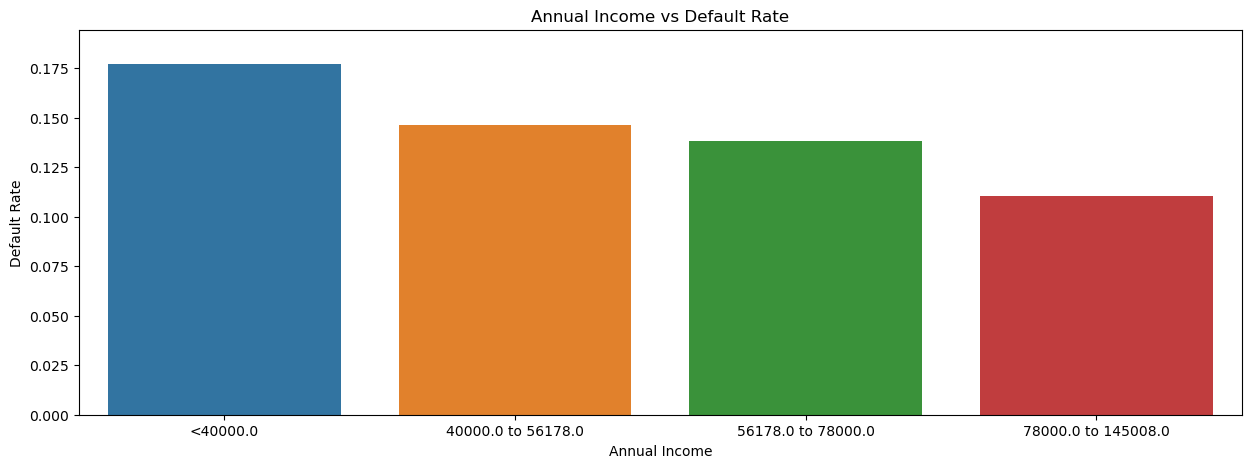

In [1044]:
plt.figure(figsize=(15,5))
sns.barplot(x='annual_inc_level', y='loan_default', data=df, errwidth=0)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.title('Annual Income vs Default Rate')

### Note: Default rate decreases with increase in Income.

<Axes: xlabel='verification_status', ylabel='loan_default'>

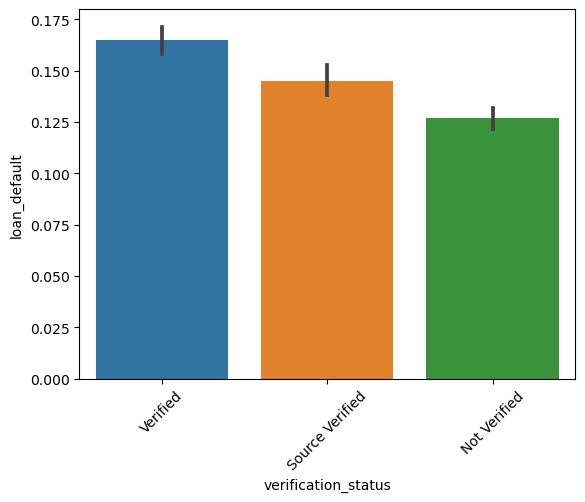

In [983]:
plt.xticks(rotation=45)
sns.barplot(x='verification_status', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Suprisingly Default rate is high among Verified Applicants than not verified.

<Axes: xlabel='year', ylabel='loan_default'>

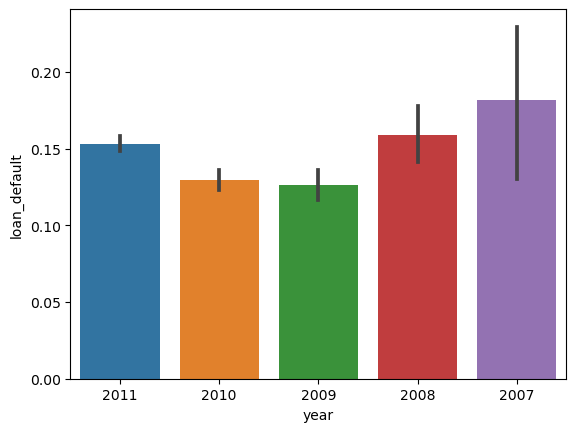

In [984]:
#dfPlot = df.sort_values(['loan_default']).reset_index(drop=True)
sns.barplot(x='year', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Default rate was high in 2007 compared to other years.

<Axes: xlabel='month', ylabel='loan_default'>

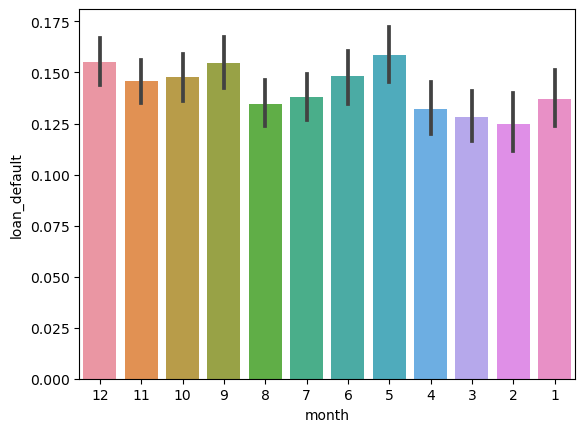

In [985]:
#dfPlot = df.sort_values(['loan_default']).reset_index(drop=True)
sns.barplot(x='month', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Default rate does not vary much across months in which loan started.

Text(0.5, 1.0, 'Purpose vs Default Rate')

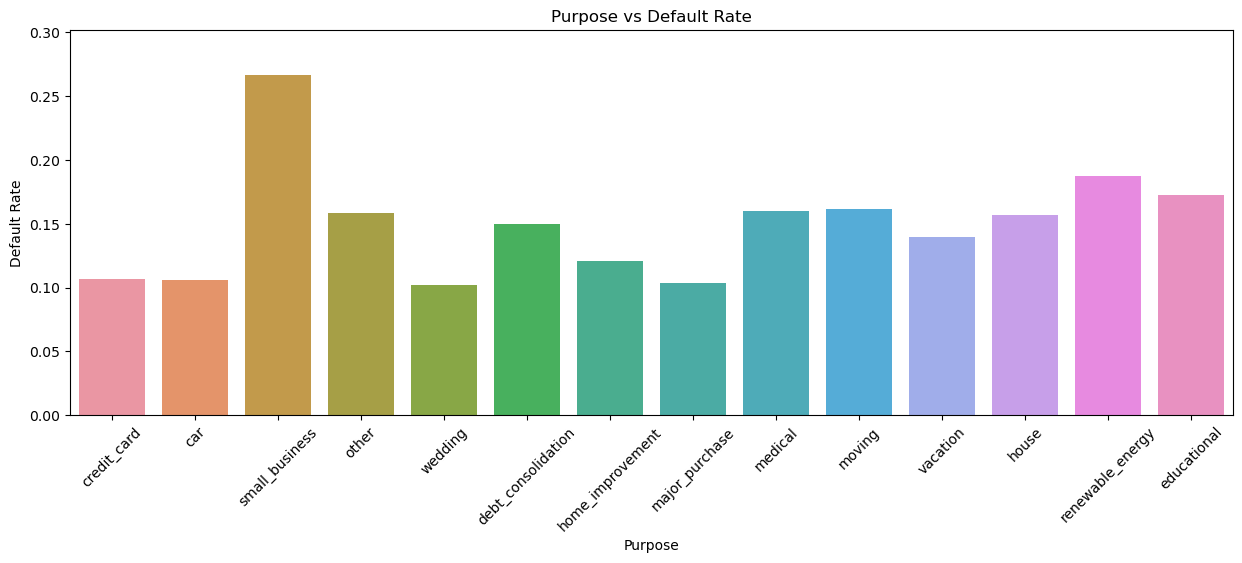

In [1035]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='purpose', y='loan_default', data=df, errwidth=0)
plt.xlabel('Purpose')
plt.ylabel('Default Rate')
plt.title('Purpose vs Default Rate')

### Note: Highest Default rate is for Small Business Loans. Renewable Energy has very small count so can be ignored.

<Axes: xlabel='addr_state', ylabel='loan_default'>

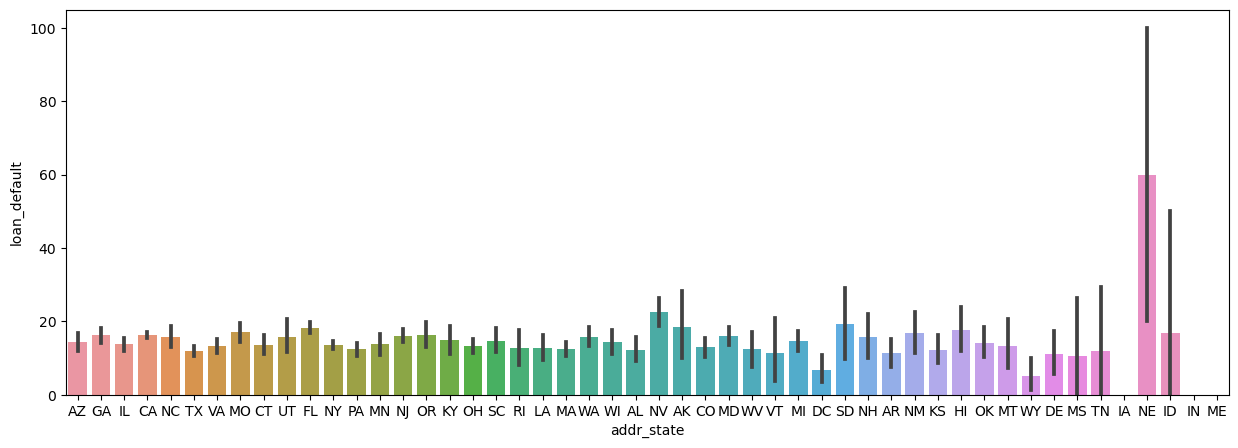

In [439]:
plt.figure(figsize=(15,5))
#dfPlot = df.sort_values(['loan_default']).reset_index(drop=True)
sns.barplot(x='addr_state', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Default rate is almost similar across states so we can conlude that it does not have any impact. 

The spike is due to very small number of loan records and out of 5 loans 3 have default hence such a high default rate of around 60%. Also default rates do not vary much accross the states so we can conclude that states do not influence much.

<Axes: xlabel='dti_level', ylabel='loan_default'>

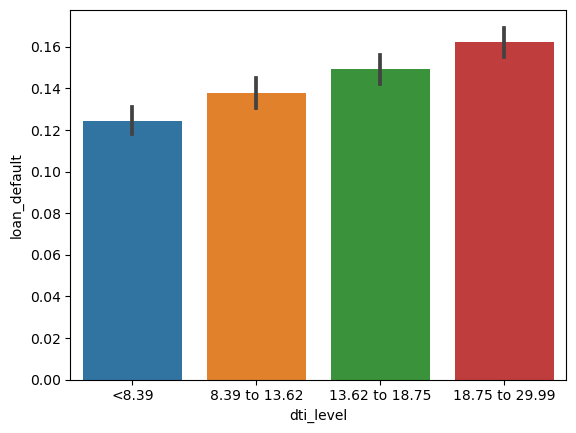

In [987]:
sns.barplot(x='dti_level', y='loan_default', data=df, errwidth=0)
plt.title('Loan Term vs Default Rate')

### Note: Default rate increases with increase in DTI ratio.

Text(0.5, 1.0, 'Record of Bankruptcies vs Default Rate')

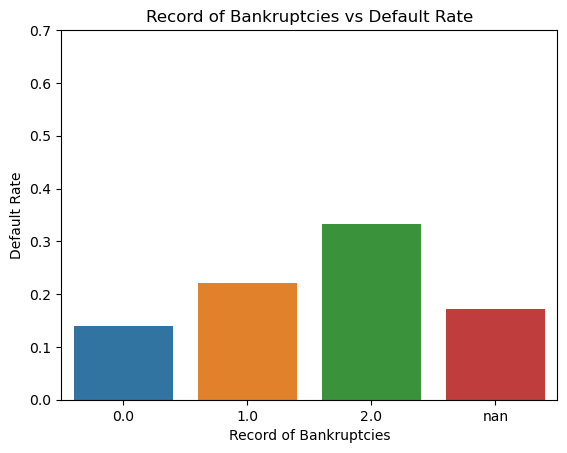

In [1036]:
sns.barplot(x='pub_rec_bankruptcies', y='loan_default', data=df, errwidth=0)
plt.xlabel('Record of Bankruptcies')
plt.ylabel('Default Rate')
plt.title('Record of Bankruptcies vs Default Rate')

### Note: As expected Default rate increases with increase in number of bankruptcy records.

In [1037]:
category_columns=["loan_amnt_level","int_rate_level","installment_level","annual_inc_level","dti_level","term","grade",
                  "verification_status","purpose",'pub_rec_bankruptcies','year','month']

list2 = []
for col in category_columns:
    default_rates = df.groupby(col).loan_default.mean().sort_values(ascending=False)
    #default_rates = default_rates.sort_values(ascending=False).reset_index(drop=True)
    list1 = [col, round(default_rates[0] - default_rates[-1],2)]
    list2.append(list1)
#print(list2)
df_impact = pd.DataFrame(list2, columns=['Attribute', 'Impact']) 
df_impact.sort_values(by=['Impact'], ascending=False)

,Attribute,Impact
6,grade,0.28
9,pub_rec_bankruptcies,0.19
1,int_rate_level,0.18
8,purpose,0.17
5,term,0.12
3,annual_inc_level,0.07
0,loan_amnt_level,0.06
10,year,0.06
4,dti_level,0.04
7,verification_status,0.04


#### We can see that 'grade' has the highest impact on default rates followed by 'pub_rec_bankruptcies', 'int_rate_level', 'purpose' and so on.

## Bivariate Analysis
#### Now we will see Bivariate analysis that is analyse 2 categorical variables with 'default_rate'. 

Text(0.5, 1.0, 'Default rate vs Annual Income vs Loan Amount')

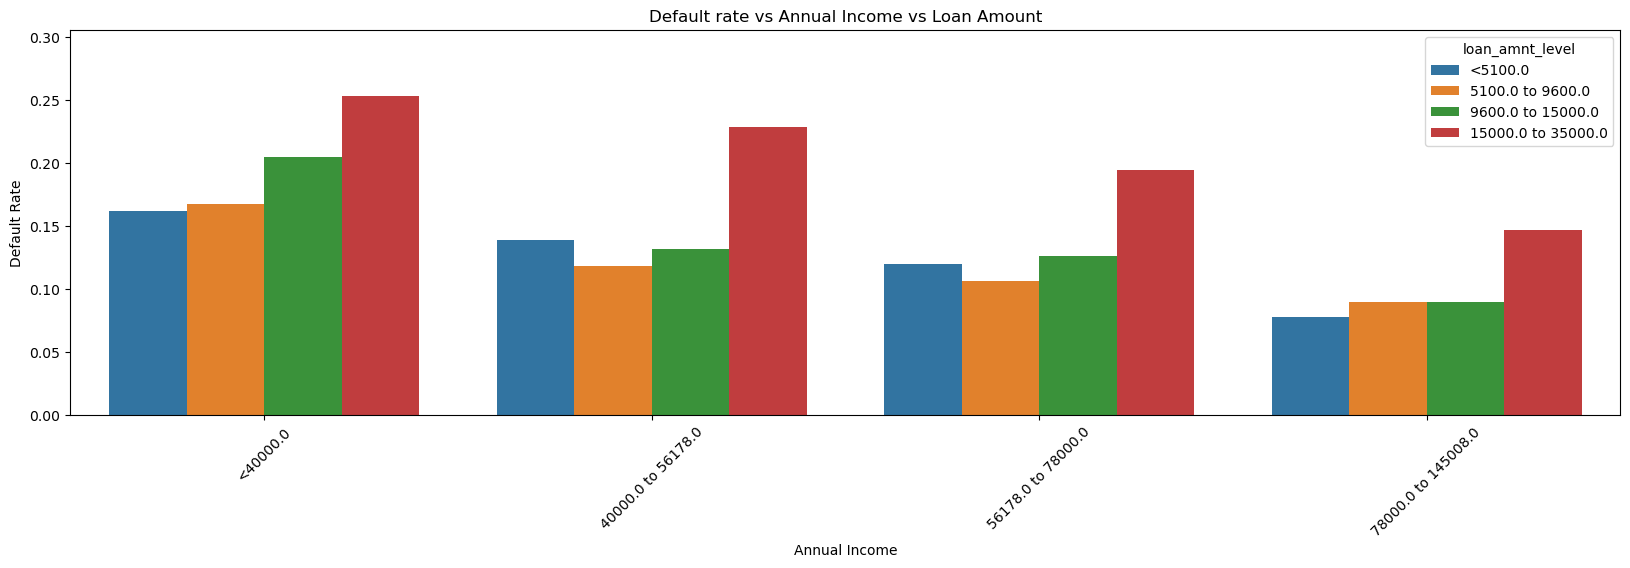

In [1047]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x='annual_inc_level', y='loan_default', data=df, hue='loan_amnt_level', errwidth=0)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.title('Default rate vs Annual Income vs Loan Amount')

### Note: People having incomes less than 40000 are taking higher amount loans this is riskier as is shown by high default rates.

<Axes: xlabel='grade', ylabel='loan_default'>

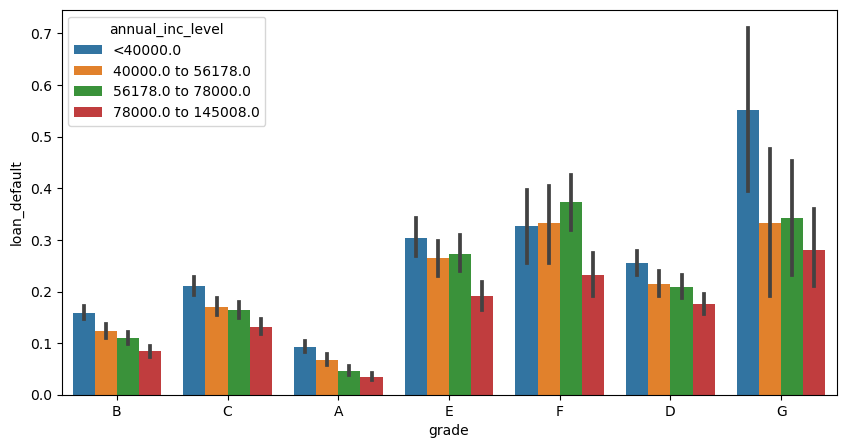

In [994]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='loan_default', data=df, hue='annual_inc_level', errwidth=0)
plt.title('Loan Term vs Default Rate')

<Axes: xlabel='term', ylabel='loan_default'>

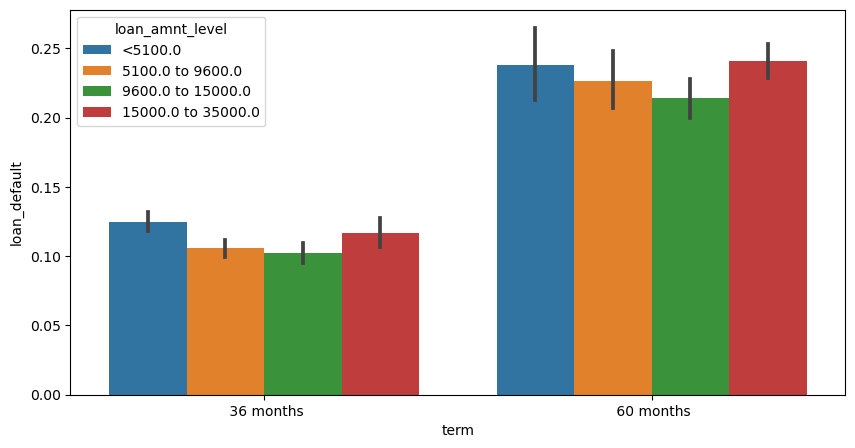

In [998]:
plt.figure(figsize=(10,5))
sns.barplot(x='term', y='loan_default', data=df, hue='loan_amnt_level', errwidth=0)
plt.title('Loan Term vs Default Rate')

### Higher loan amount are associated with longer terms and see higher default rates.

<Axes: xlabel='verification_status', ylabel='loan_default'>

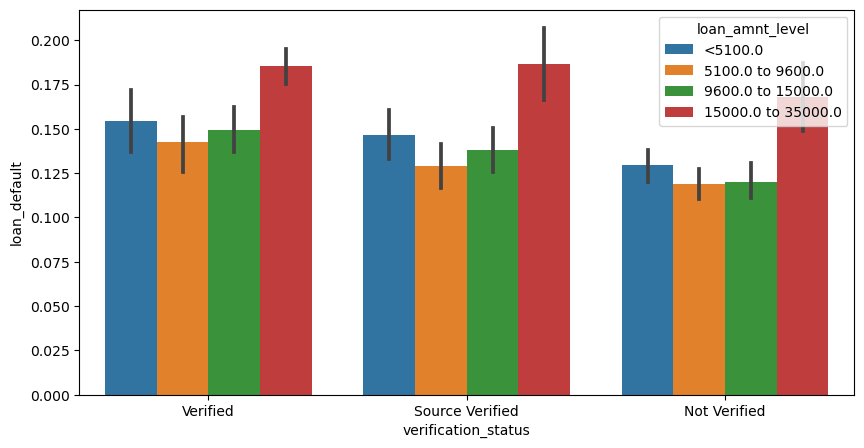

In [996]:
plt.figure(figsize=(10,5))
sns.barplot(x='verification_status', y='loan_default', data=df, hue='loan_amnt_level', errwidth=0)
plt.title('Loan Term vs Default Rate')

<Axes: xlabel='term', ylabel='loan_default'>

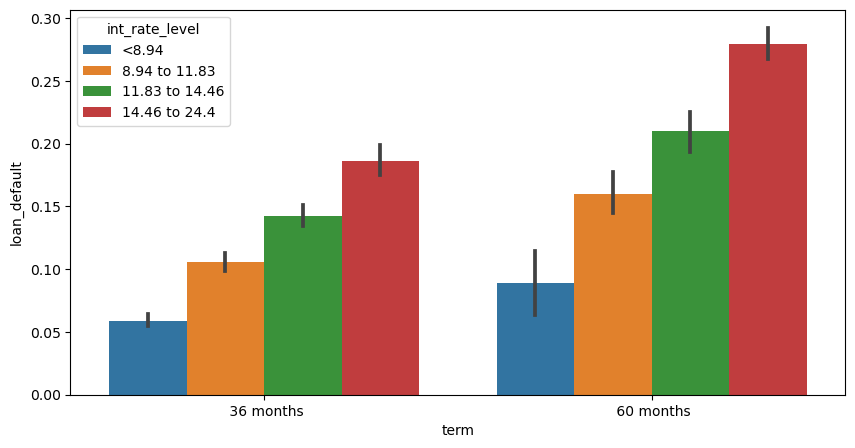

In [997]:
plt.figure(figsize=(10,5))
sns.barplot(x='term', y='loan_default', data=df, hue='int_rate_level', errwidth=0)
plt.title('Loan Term vs Default Rate')